In [ ]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# SKLEARN DATASET - DIGITS
from sklearn.datasets import load_digits
digits = load_digits()

#digits.images = images
#digits.target = target 

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# ONE OPENML DATASET
from sklearn.datasets import fetch_openml
mice = fetch_openml(name='miceprotein', version=4)


In [ ]:
https://github.com/alitapan/comp-551/blob/master/Assignment1/logistic_regression/logistic_regression.ipynb 

In [ ]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad


In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=0)
w = np.zeros([x.shape,len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print (loss)


TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))

def gradient(self, x, y, w):
    N,D = x.shape
    yh = logistic(np.dot(x, w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad   

class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w,t,grad
    


class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self,x, y,optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        w0 = np.zeros(D)
        
        #self.w = optimizer.run(gradient, x, y)    
        #g = np.inf 
        #t = 0
        # the code snippet below is for gradient descent
        self.w,t,g = optimizer.run(self.gradient, x, y, w0) 
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh
    def multiclass_predict(self,x,w):
        prediction=logistic(np.dot(x,self.w))
        predict_arr=[]
        for i in prediction:
            predict_arr.append(np.argmax(i))
        return predict_arr
    

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

SyntaxError: invalid syntax (<ipython-input-99-56cb175bac74>, line 72)

In [ ]:
def create_mini_batches(x,y,batch_size):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-83-475ce1a713a9>, line 2)

terminated after 100000 iterations, with norm of the gradient equal to 0.004260284667121665
the weight found: [-6.27790214e+00  2.97639850e-16]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 9.99999999e-01 9.99999998e-01 9.99999991e-01 9.99999969e-01
 9.99999889e-01 9.99999601e-01 9.99998563e-01 9.99994824e-01
 9.99981361e-01 9.99932885e-01 9.99758362e-01 9.99130415e-01
 9.96875714e-01 9.88840212e-01 9.60947441e-01 8.72339778e-01
 6.54889590e-01 3.45110410e-01 1.27660222e-01 3.90525594e-02
 1.11597877e-02 3.12428596e-03 8.69584698e-04 2.41637704e-04
 6.71151329e-05 1.86389505e-05 5.17615472e-06 1.43743700e-06
 3.99180408e-07 1.10853469e-07 3.07842992e-08 8.54888015e-09
 2.37404627e-09 6.59278824e-10 1.83083444e-10 5.08427486e-11
 1.41191635e-11 3.92092843e-12 1.08885202e-12 3.02377038e-13
 8.39708899e-14 2.33189345e-14]


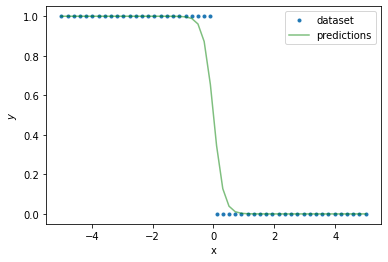

In [ ]:
N = 50
x = np.linspace(-5,5, N)
y = ( x < 0).astype(int)  
logistic = lambda z: 1./ (1 + np.exp(-z))
model = LogisticRegression(verbose=True, )
optimizer = GradientDescent(learning_rate=.005, max_iters=100000, record_history=True)
yh = model.fit(x,y,optimizer).predict(x)
print(yh)
plt.plot(x, y, '.', label='dataset')
plt.plot(x, yh, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

terminated after 1000 iterations, with norm of the gradient equal to 180.2413403099918
the weight found: [0.00000000e+00 9.63564031e+00 1.73459833e+02 4.05888686e+02
 4.24111448e+02 2.30721787e+02 6.55755178e+01 7.58770601e+00
 1.66898664e-01 6.49000612e+01 3.72640223e+02 4.03832506e+02
 3.24036938e+02 3.03890635e+02 8.81280512e+01 5.65189310e+00
 1.11302895e-02 8.25245323e+01 3.51367205e+02 2.18079939e+02
 2.20093753e+02 2.97380986e+02 7.41667595e+01 2.12510022e+00
 3.33797327e-02 7.03094599e+01 3.28146487e+02 3.48269638e+02
 3.83763179e+02 3.04477055e+02 8.60288419e+01 3.33797327e-02
 0.00000000e+00 6.33675780e+01 2.71849415e+02 3.71512138e+02
 3.97138213e+02 3.31471286e+02 1.00982778e+02 0.00000000e+00
 3.67177060e-01 4.66990089e+01 2.26346069e+02 2.57129961e+02
 2.76255412e+02 2.88816576e+02 1.14990033e+02 1.81350223e+00
 1.00150334e-01 2.36660857e+01 2.39642155e+02 3.12575707e+02
 2.76219104e+02 2.66057049e+02 1.22433664e+02 4.48415924e+00
 1.11302895e-02 8.99036748e+00 1.88902790

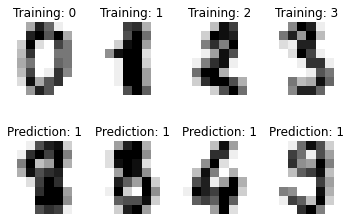

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
# https://medium.com/@awjuliani/simple-softmax-in-python-tutorial-d6b4c4ed5c16


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference


n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=0)

logistic = lambda z: 1./ (1 + np.exp(-z))
model = LogisticRegression(verbose=True, )
optimizer = GradientDescent(learning_rate=.01, max_iters=1000, record_history=True)
predicted = model.fit(x_train, y_train, optimizer).predict(x_test)


_, axes = plt.subplots(2, 4)
print(predicted)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1,:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)


In [ ]:
#print(type(yh))
#print(digits.target)
print(data[0].shape)
#print(yh.shape)
print(digits.images[0].shape)

(64,)
(8, 8)


In [ ]:
predicted